In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Description

Craigslist is the world's largest collection of used vehicles for sale,this dataset which includes every used vehicle entry within the United States on Craigslist.

# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading Data

In [3]:


df=pd.read_csv("/content/drive/MyDrive/Collab Notebooks/vehicles.csv")

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [6]:
df.shape

(423857, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

# Data cleaning

In [8]:
r=df.columns
for i in r:
    print(df[i].value_counts())

id
7184791621    1
7194329361    1
7194912790    1
7185506469    1
7185509110    1
             ..
7196664431    1
7196664662    1
7196665504    1
7196665569    1
7195109037    1
Name: count, Length: 423857, dtype: int64
url
https://duluth.craigslist.org/ctd/d/duluth-2000-gmc-new-sierra-1500-ext-cab/7184791621.html           1
https://boston.craigslist.org/gbs/ctd/d/belmont-jeep-wrangler-4x4-sahara-2dr/7194329361.html          1
https://orangecounty.craigslist.org/ctd/d/buena-park-2016-lexus-es-350-skug-sedan/7194912790.html     1
https://cincinnati.craigslist.org/ctd/d/camp-dennison-2014-audi-a4/7185506469.html                    1
https://cincinnati.craigslist.org/ctd/d/cincinnati-2016-ram-promaster-1500-low/7185509110.html        1
                                                                                                     ..
https://portland.craigslist.org/mlt/ctd/d/portland-2016-ford-escape-4x4-4wd-se-suv/7196664431.html    1
https://portland.craigslist.org/clc/ctd/d/portl

Based on above observation the features which are too common or of no use like url can be dropped

In [9]:
df= df.drop(columns=['id','url', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county','region'], axis=1)

In [10]:
df.shape

(423857, 15)

In [11]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


In [12]:
df.describe()

,price,year,odometer
count,4.238570e+05,328743.000000,2.705850e+05
mean,5.779437e+04,2009.827358,9.942578e+04
std,1.002581e+07,10.135809,1.204833e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.499000e+03,2007.000000,4.432400e+04
50%,9.995000e+03,2012.000000,9.174900e+04
75%,1.899500e+04,2016.000000,1.372370e+05
max,3.808256e+09,2021.000000,1.000000e+07


# Handling outliers

Lets see if any outliers in Target variable as we remove them the model can be more accurate because they cause a bring a lot of difference in values of mean and SD.

the difference between 75% value and max value is too large so lets leave 10% values at both ends of a distribution

In [13]:
rr=sorted(df["price"])

In [14]:
quantile1, quantile3= np.percentile(rr,[10,90])

In [15]:
print(quantile1,quantile3)

389.6000000000058 31500.0


In [16]:
df=df[(df.price < 27500) & (df.price >= 500 )]
df.shape

(322693, 15)

Lets observe the odometer column

In [17]:
r=sorted(df["odometer"])
r

[137.0,
 45431.0,
 48932.0,
 49858.0,
 64515.0,
 76202.0,
 77200.0,
 79160.0,
 81900.0,
 86942.0,
 88000.0,
 89156.0,
 89875.0,
 90000.0,
 90112.0,
 90821.0,
 91840.0,
 92800.0,
 94800.0,
 102000.0,
 102462.0,
 102825.0,
 103000.0,
 115000.0,
 116711.0,
 124995.0,
 125000.0,
 126207.0,
 128000.0,
 135000.0,
 138588.0,
 142835.0,
 143528.0,
 148334.0,
 150959.0,
 167783.0,
 nan,
 108124.0,
 145955.0,
 152415.0,
 159000.0,
 160600.0,
 170259.0,
 170684.0,
 176386.0,
 178054.0,
 178108.0,
 181986.0,
 184817.0,
 188406.0,
 196913.0,
 200000.0,
 208016.0,
 210865.0,
 223470.0,
 254217.0,
 271000.0,
 309621.0,
 nan,
 nan,
 nan,
 299000.0,
 nan,
 nan,
 8000.0,
 36000.0,
 53300.0,
 62000.0,
 65000.0,
 68559.0,
 73000.0,
 82000.0,
 91806.0,
 94448.0,
 100460.0,
 110000.0,
 113000.0,
 130000.0,
 143700.0,
 156559.0,
 167828.0,
 186200.0,
 229937.0,
 nan,
 85000.0,
 176000.0,
 204496.0,
 230500.0,
 242613.0,
 262000.0,
 nan,
 nan,
 208453.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 196000

There are nan values and only one 0 value

In [18]:
df["odometer"].isna().sum()

117593

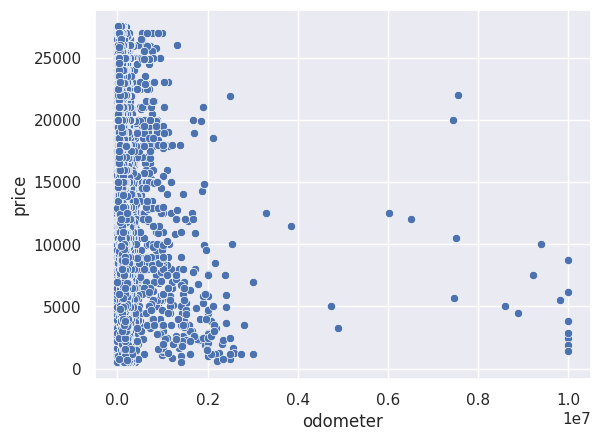

In [19]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [20]:
df["odometer"].max()

10000000.0

In [21]:
df.drop(df[df["odometer"]==64809218.0].index,inplace=True)

In [22]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

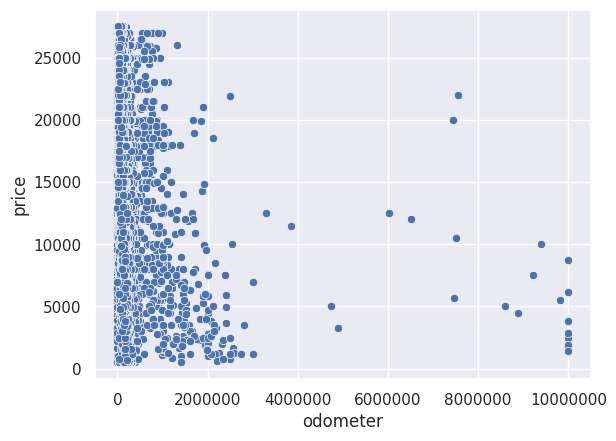

In [23]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [24]:
df["odometer"].isna().sum()

117593

here the values above 3000000  can be considered as outliers

In [25]:
df=df[(df.odometer < 3000000)]

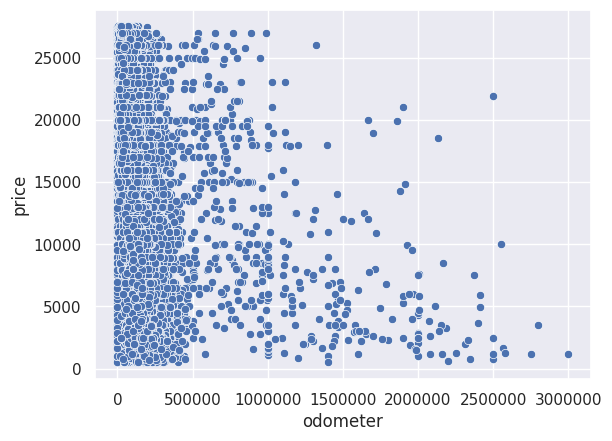

In [26]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Now lets see year column

In [27]:
df["odometer"].isna().sum()

0

In [28]:
df["year"].isna().sum()

471

the null values in a year column cannot be replaced so lets eliminate them

In [29]:
df["year"].min()

1919.0

we must alo drop this 0 values

In [30]:
df.drop(df[df["year"]==0.0].index,inplace=True)

In [31]:
df=df.dropna(subset=['year'])

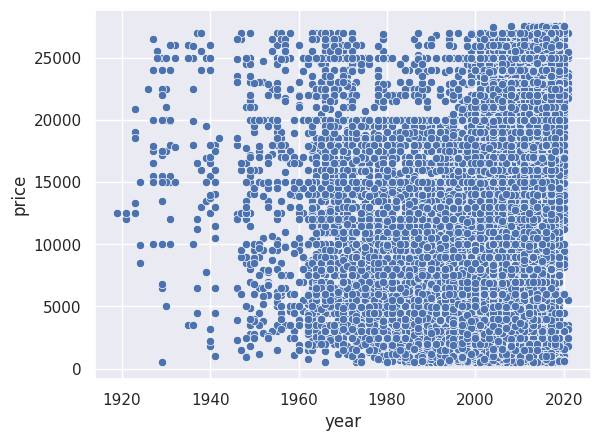

In [32]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [33]:
df=df[(df.year > 1940)]

we have removed outliers from all three numerical columns .
now lets how we can remove with nan values if any.

# Handling Null Values

I am taking out % of null values in each column

In [34]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,12960400,63.617
condition,7777500,38.177
cylinders,6546200,32.133
paint_color,4872100,23.915
drive,4708300,23.111
type,3891800,19.103
manufacturer,623500,3.061
model,157000,0.771
fuel,144800,0.711
title_status,112100,0.550


In [35]:
df.condition.value_counts()

,count
condition,
excellent,60679
good,48590
like new,11258
fair,4796
new,321
salvage,305


the misssing values in the condition can be found using odometer as mileage affects condition of car.

what i am trying to do here is finding mean value of odometer readings grouping by there conditions

In [36]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [37]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 85098.04
Excellent average odometer: 112103.1
Good average odometer: 121570.61
Fair average odometer: 182986.37
Salvage average odometer: 168911.82


these are mean values regarding each condition.

now these can be used to group the odometer readings which have nan values in condition.

In [38]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

the values are being filled by the values from above calculated mean value ranges

In [39]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) &
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) &
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) &
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) &
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) &
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) &
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [40]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,12960400,63.617
cylinders,6546200,32.133
paint_color,4872100,23.915
drive,4708300,23.111
type,3891800,19.103
manufacturer,623500,3.061
model,157000,0.771
fuel,144800,0.711
title_status,112100,0.550
transmission,82700,0.406


I am droping the null values with less then 5% nan.

In [41]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

I am also droping the columns with more then 30% null values.
but cylinders can be important feature .

In [42]:
df=df.drop(["size"],axis=1)

In [43]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,6176000,31.960
paint_color,4617300,23.894
drive,4431900,22.934
type,3672300,19.004
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [44]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

<ipython-input-44-f0493537b5eb>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['paint_color'] = df['paint_color'].fillna(method='ffill')
<ipython-input-44-f0493537b5eb>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['drive'] = df['drive'].fillna(method='ffill')


In [45]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

<ipython-input-45-ef225f928e01>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['type'] = df['type'].fillna(method='ffill')
<ipython-input-45-ef225f928e01>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'] = df['cylinders'].fillna(method='ffill')


In [46]:
df.isnull().sum()

,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


In [47]:
df=df.dropna(subset=['cylinders','drive'])

In [48]:
df.isnull().sum()

,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0


# Exploratory Data Analysis

In [49]:
from scipy import stats

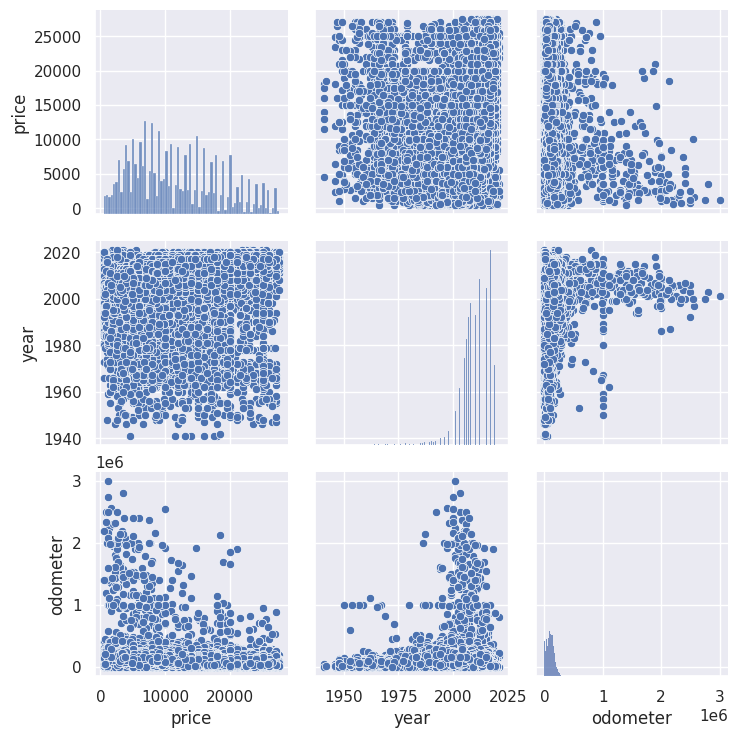

In [50]:
sns.pairplot(df)

The above were relation between numerical values of the table.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193243 entries, 0 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         193243 non-null  int64  
 1   year          193243 non-null  float64
 2   manufacturer  193243 non-null  object 
 3   model         193243 non-null  object 
 4   condition     193243 non-null  object 
 5   cylinders     193243 non-null  object 
 6   fuel          193243 non-null  object 
 7   odometer      193243 non-null  float64
 8   title_status  193243 non-null  object 
 9   transmission  193243 non-null  object 
 10  drive         193243 non-null  object 
 11  type          193240 non-null  object 
 12  paint_color   193243 non-null  object 
 13  state         193243 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 22.1+ MB


In [52]:
c=df.columns
for i in c:
    print(df[i].value_counts())

price
7995     2595
8995     2523
6995     2386
9995     2372
5995     2241
         ... 
20893       1
17879       1
7165        1
23355       1
9584        1
Name: count, Length: 8905, dtype: int64
year
2017.0    15378
2013.0    14735
2014.0    13842
2012.0    13140
2011.0    12678
          ...  
1961.0        8
1954.0        7
1952.0        3
1947.0        3
1942.0        1
Name: count, Length: 78, dtype: int64
manufacturer
ford               33184
chevrolet          26703
toyota             16707
honda              13674
nissan             12246
jeep                8519
dodge               7617
gmc                 6492
hyundai             6423
subaru              6093
volkswagen          5306
bmw                 5183
kia                 5113
ram                 4481
mercedes-benz       4094
chrysler            4082
buick               3251
mazda               3008
cadillac            2760
lexus               2630
audi                2071
acura               1995
lincoln           

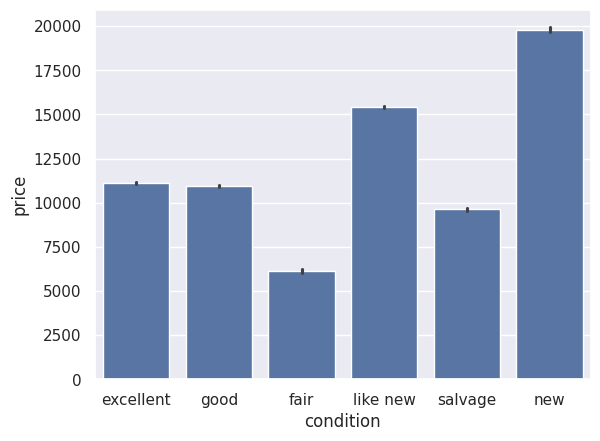

In [53]:
ax = sns.barplot(x="condition", y="price", data=df)

Clearly vehicles with condition  new has highest price as one expects.

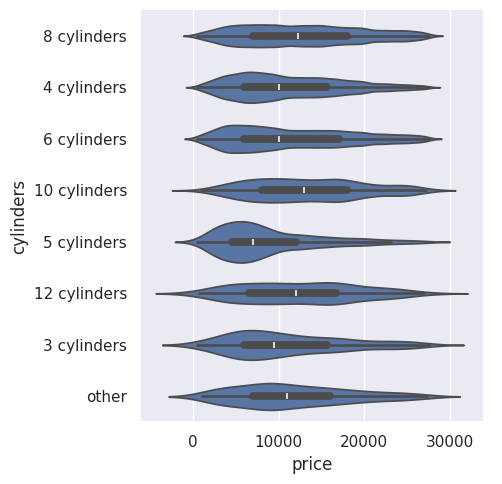

In [54]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

This violinplot provides clear idea about the distribution of number of cylinders and the price.

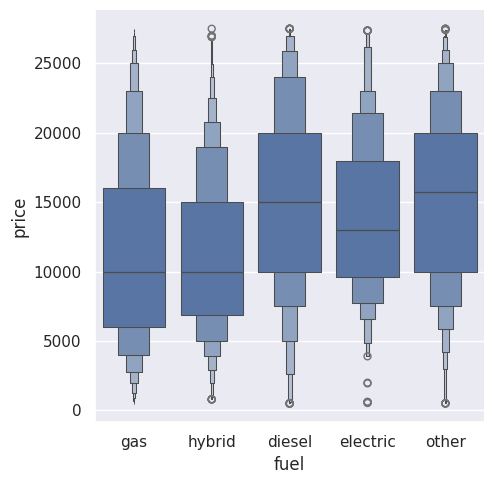

In [55]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

This figure shows the price range between which majority of each type of car based on fuel lies.

Gas=5k-17k

diesel=12k-20k

hybrid=7k-15k

other=11k-20k

electric=10k-18k

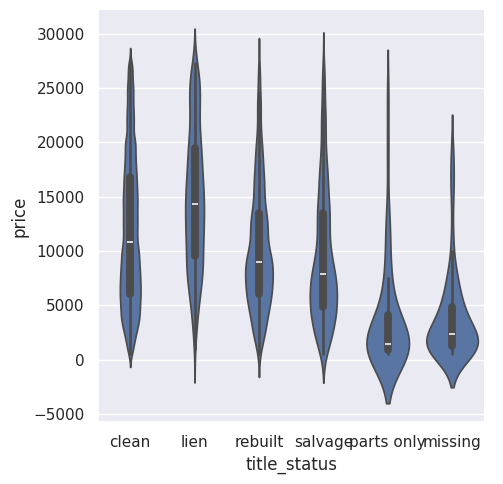

In [56]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

The distribution of price of cars based on title_status can be seen here.

<ipython-input-57-c834f00e0e87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)


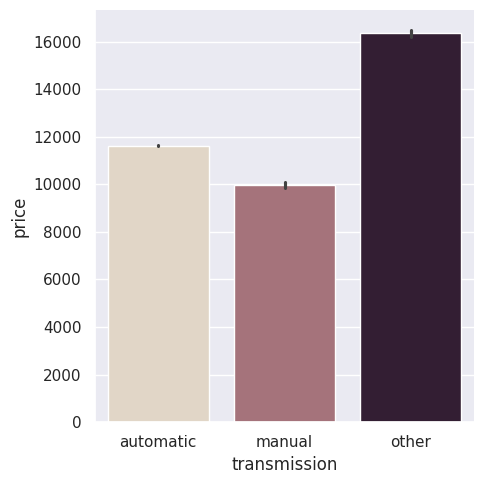

In [57]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

The relation between price and transmission.

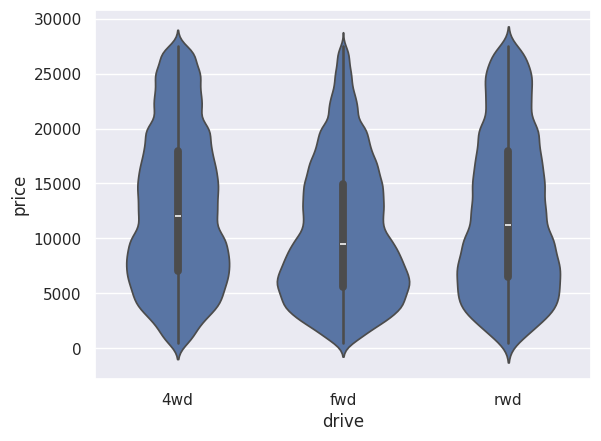

In [58]:
sns.violinplot(x=df.drive, y=df.price);

There doesnt seem too be much difference between the first 2 types of drives .

The third one is a bit different.

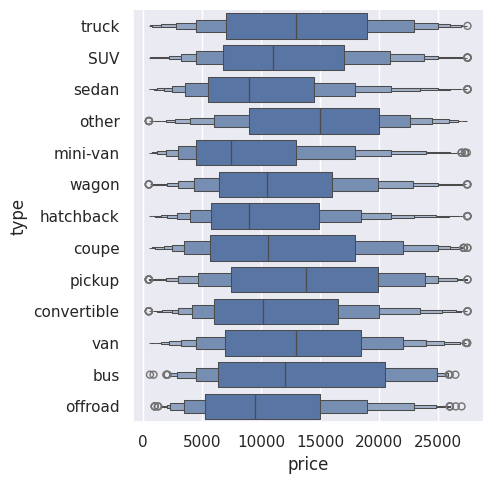

In [59]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

Important observation can be obtained from the above figure regarding the price bracket for each type of vehicle.

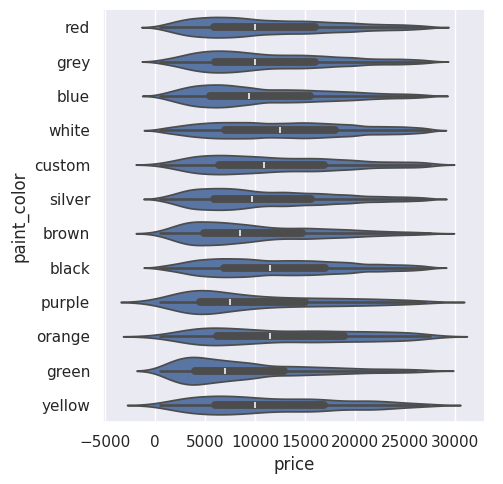

In [60]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

Important observation can be obtained from the above figure regarding the distribution of price bracket for each color of vehicle.

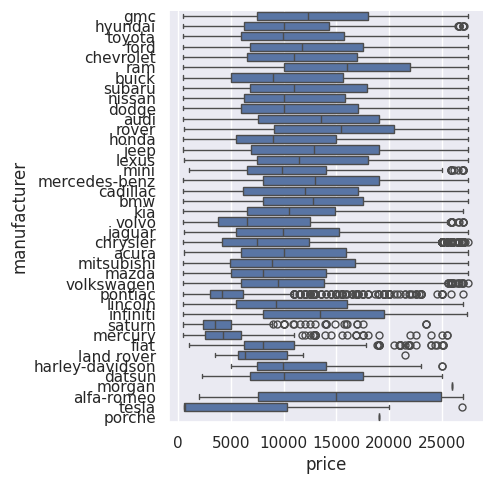

In [61]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

It just gives and idea about prices based on the manufacturer.

#  Label Processing


In [62]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [63]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [64]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

# Split Train and Test data


In [65]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [66]:
y= df.price
X= df.drop('price',axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(154594, 13) (154594,)
(38649, 13) (38649,)


# Training Model

# Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [71]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1726.32
Mean Squared Error: 7435213.35
Root Mean Squared Error: 2726.76
83.48886338895434


The accuracy is 86.02 .

# Gradient Boosting

In [77]:
# ... (Previous code including Random Forest section remains the same) ...

# Gradient Boosting Machine (GBM) with Hyperparameter Tuning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

# 1. Define the hyperparameter grid:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# 2. Create the base GBM model:
gbm_regressor = GradientBoostingRegressor(random_state=0)

# 3. Perform Grid Search:
grid_search = GridSearchCV(gbm_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 4. Get the best model:
best_gbm_regressor = grid_search.best_estimator_

# 5. Make predictions using the best model:
y_pred_gbm = best_gbm_regressor.predict(X_test)

# 6. Evaluate the best model:
print('\nGradient Boosting Machine Metrics (with Tuning):')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_gbm),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_gbm),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbm)),2))
print('R-squared (Accuracy):', round(best_gbm_regressor.score(X_test,y_test)*100,2))

# ... (Rest of the code remains the same) ...


Gradient Boosting Machine Metrics (with Tuning):
Mean Absolute Error: 1751.41
Mean Squared Error: 6506478.95
Root Mean Squared Error: 2550.78
R-squared (Accuracy): 85.55
